In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import netCDF4 as nc
import xarray as xr
import scipy.ndimage
import scipy as sp
import alphashape
import glob
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from matplotlib import style
import seaborn as sns
style.use('ggplot') or plt.style.use('ggplot')


In [2]:
# Read in the grounded area csv files

fluxes = [100, 200, 300, 400, 500]
sigmas = [4000, 8000, 12000, 16000]
sims = []

for i in fluxes:
    for j in sigmas:
        if i == 400 and j == 12000:
            pass
        else:
            sims.append('Flux' + str(i) + 'Sigma' + str(j))
        
dfs = {}
for sim in sims:
    if sim == 'Flux400Sigma12000':
        pass
    else:
        dfs[sim] = pd.read_csv('../Data/GroundedMask/' + str(sim) + '.csv')
    

In [21]:
# Find the maximum grounded width for each simulation

miny = {}
maxy = {}
GroundedWidths = {}
dfs_GL = {}
for sim in sims:
    if sim == 'Flux400Sigma12000':
        pass
    else:
        dfs_GL[sim] = dfs[sim][dfs[sim]['groundedmask'] == 0]
        miny[sim] = dfs_GL[sim]['Points:1'].min()
        maxy[sim] = dfs_GL[sim]['Points:1'].max()
        GroundedWidths[sim] = (maxy[sim] - miny[sim])/1000.0


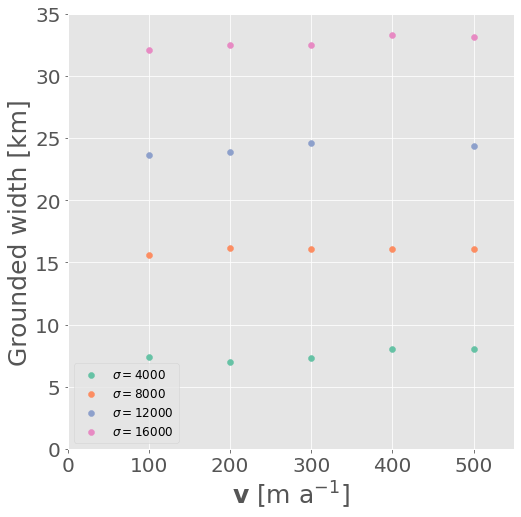

In [30]:

colors = sns.color_palette("Set2").as_hex()
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
for i in range(len(fluxes)):
    for j in range(len(sigmas)):
        if i == 3 and j == 2:
            pass
        else:
            if i == 0:
                ax.scatter(fluxes[i], GroundedWidths['Flux' + str(fluxes[i]) + 'Sigma' + str(sigmas[j])], label=r'$\sigma = $' + str(sigmas[j]), color=colors[j])
            else:
                ax.scatter(fluxes[i], GroundedWidths['Flux' + str(fluxes[i]) + 'Sigma' + str(sigmas[j])], color=colors[j])
ax.legend(fontsize='12')
ax.set_xlim([0, 550])
ax.set_ylim([0, 35])
ax.set_xlabel(r'$\bf{v}$ [m a$^{-1}$]', size=25)
ax.set_ylabel(r'Grounded width [km]', size=25)
ax.tick_params(axis='both', which='major', labelsize=20)
fig.savefig('../Figures/vel_gwidth.jpg', format='jpg', dpi=700, bbox_inches = "tight")
